<a href="https://colab.research.google.com/github/mrtkp9993/QuantitaveFinanceExamplesPy/blob/main/08_technical_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas_ta
!pip install mplfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import mplfinance as mpf

In [3]:
data = yf.download("SISE.IS", period = "max", interval="15m", start="2021-07-15") # Start date must be within the last 60 days for 5m frequency.
data.drop(['Close'], axis=1, inplace=True)
data.rename(columns={'Adj Close':'Close'}, inplace=True)
data.index.name = 'Date'
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-07-16 10:00:00+03:00,7.62,7.62,7.60,7.60,1021379
2021-07-16 10:15:00+03:00,7.61,7.62,7.59,7.61,989176
2021-07-16 10:30:00+03:00,7.61,7.61,7.58,7.58,957615
2021-07-16 10:45:00+03:00,7.59,7.60,7.58,7.59,684927
2021-07-16 11:00:00+03:00,7.58,7.59,7.56,7.57,1155719
...,...,...,...,...,...
2021-09-01 16:15:00+03:00,8.86,8.87,8.85,8.87,714844
2021-09-01 16:30:00+03:00,8.86,8.87,8.85,8.86,1250769
2021-09-01 16:45:00+03:00,8.85,8.87,8.84,8.85,2522754


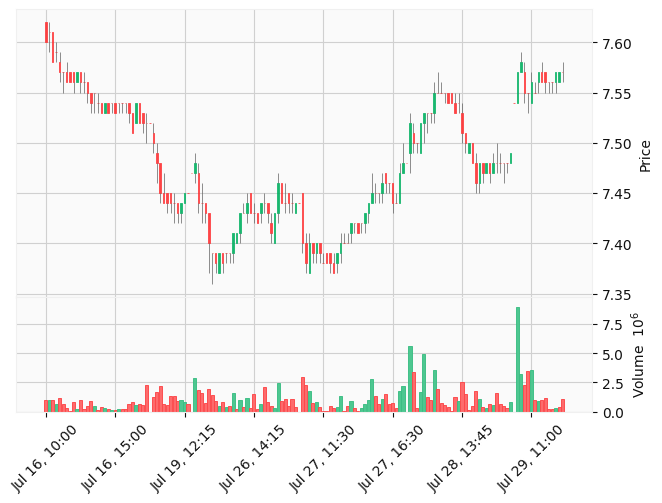

In [4]:
n = 150
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle',
         style='yahoo')

In [5]:
# Technical indicators can be divided into four groups

## Trend
adx = data.ta.adx()
sma = data.ta.sma()
macd = data.ta.macd()

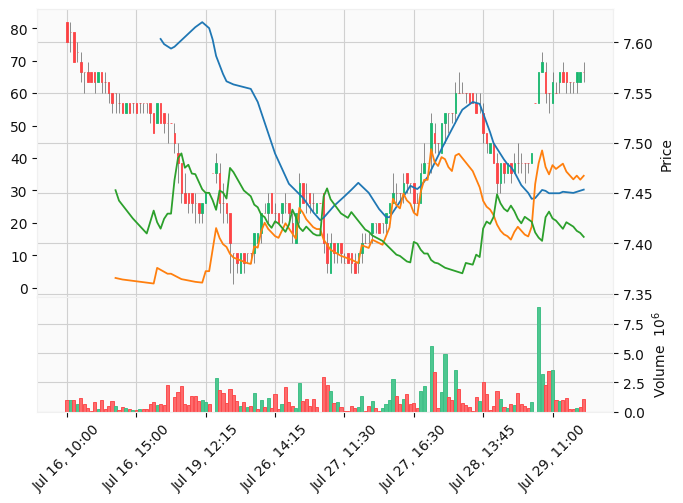

In [6]:
n = 150
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(adx[:n]),
         style='yahoo')

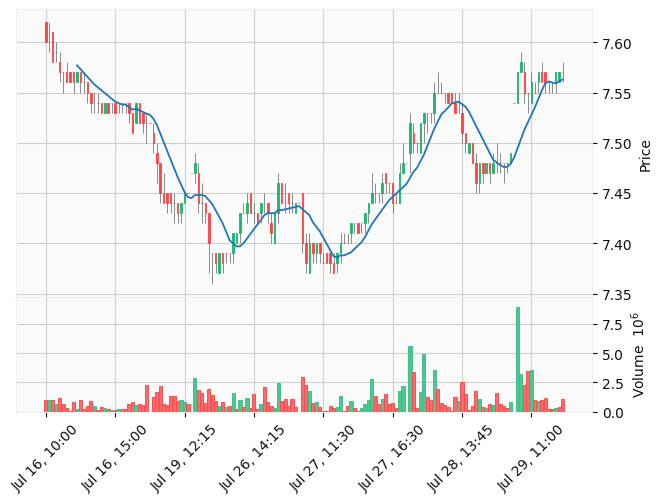

In [7]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(sma[:n]),
         style='yahoo')

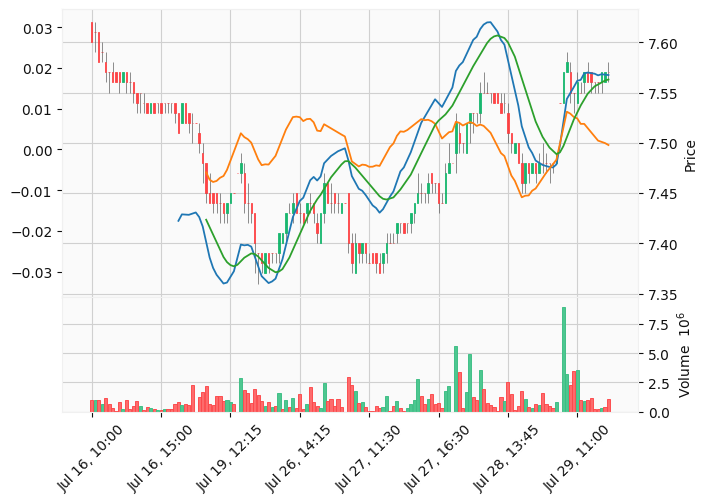

In [8]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(macd[:n]),
         style='yahoo')

In [9]:
# Momentum CCI, RSI, Stochastic
cci = data.ta.cci()
rsi = data.ta.rsi()
sto = data.ta.stoch()

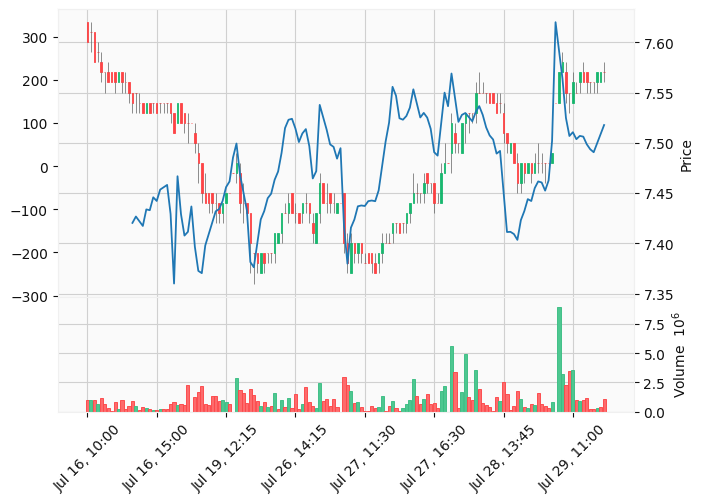

In [10]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(cci[:n]),
         style='yahoo')

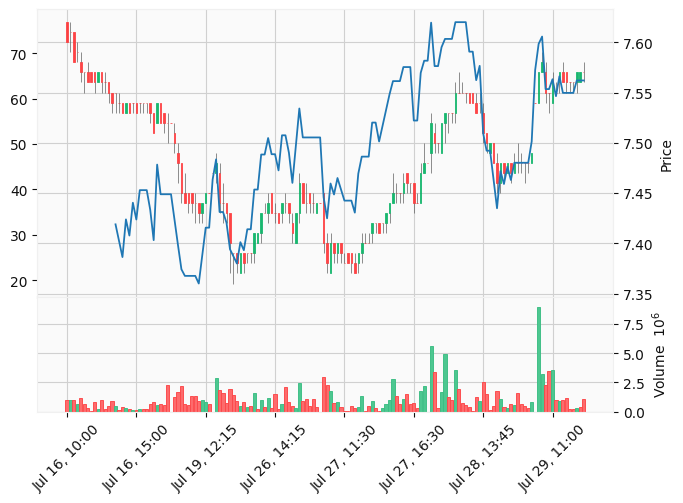

In [11]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(rsi[:n]),
         style='yahoo')

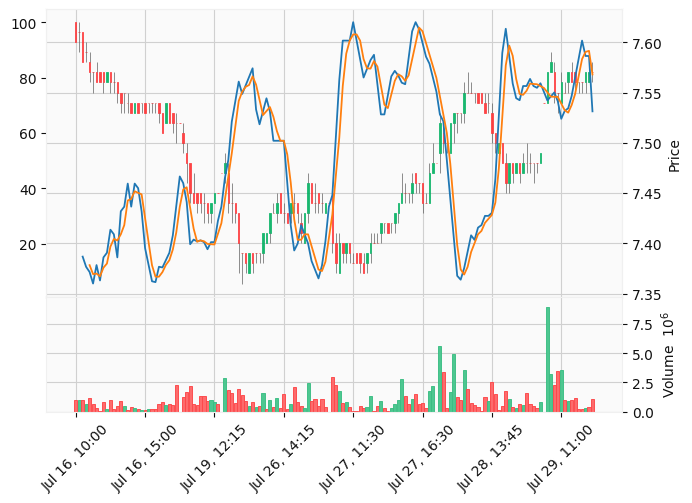

In [12]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(sto[:n]),
         style='yahoo')

In [13]:
# Volatility ATR, BB
atr = data.ta.atr()
bb = data.ta.bbands()

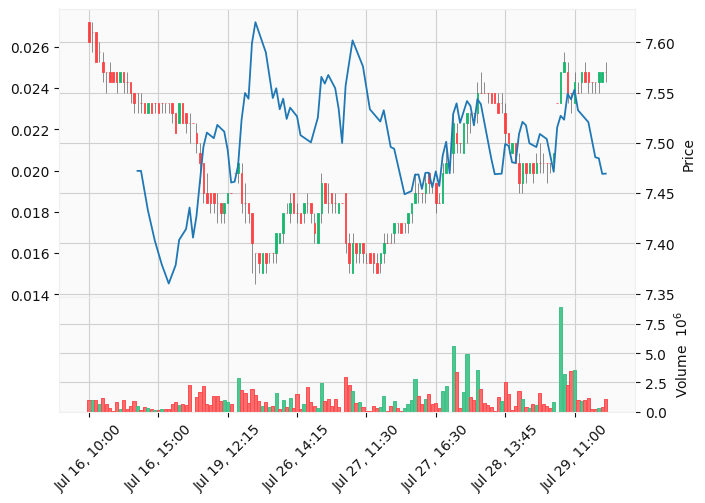

In [14]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(atr[:n]),
         style='yahoo')

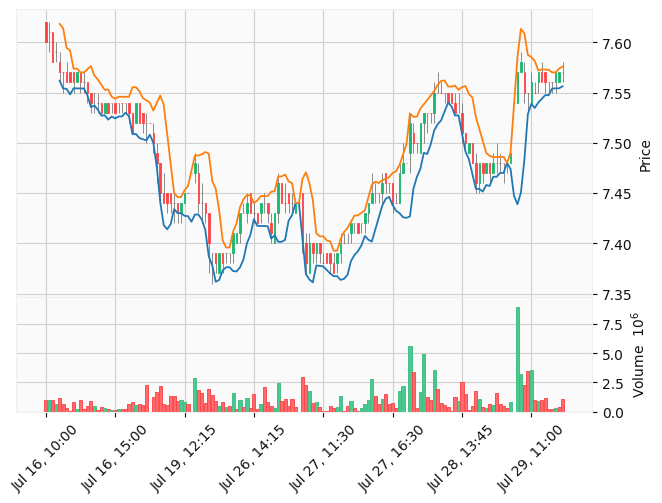

In [15]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(bb.iloc[:n, [0,2]]),
         style='yahoo')

In [16]:
# Volume 
obv = data.ta.obv()

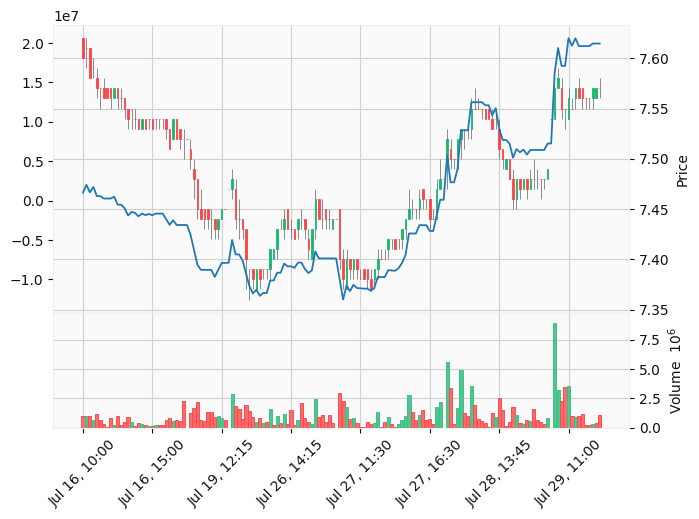

In [17]:
mpf.plot(data.iloc[:n], 
         volume=True, 
         type='candle', 
         addplot=mpf.make_addplot(obv[:n]),
         style='yahoo')

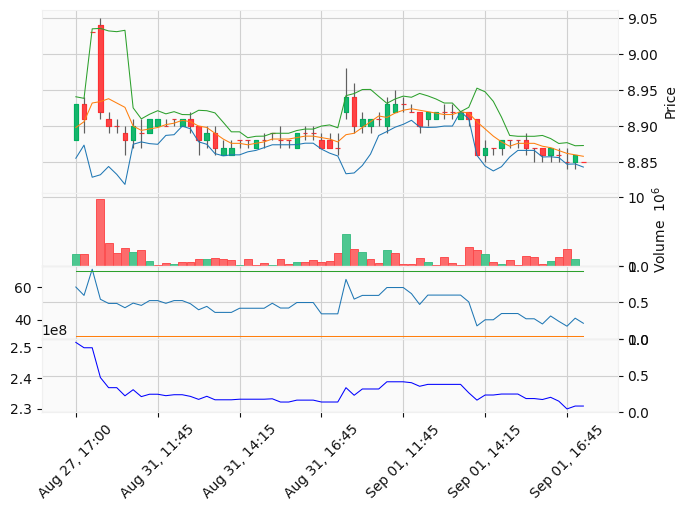

In [39]:
## Combine indicators
bb = data.ta.bbands()
rsi = data.ta.rsi()
obv = data.ta.obv()

### RSI Lines
hline0 = [30] * data.shape[0]
hline1 = [70] * data.shape[0]

n = 63

apds = [mpf.make_addplot(bb.iloc[-n:, [0,1,2]], width=0.75),
        mpf.make_addplot(rsi[-n:],panel=2,secondary_y=True, width=0.75),
        mpf.make_addplot(hline0[-n:], panel=2, secondary_y=True, width=0.75),
        mpf.make_addplot(hline1[-n:], panel=2, secondary_y=True, width=0.75),
        mpf.make_addplot(obv[-n:],panel=3,color='b',secondary_y=True, width=0.75),
       ]

mpf.plot(data.iloc[-n:],
         volume=True,  
         type='candle',
         style='yahoo',
         num_panels=4,
         addplot=apds
         )